<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Unsupervised ML Modelle: K-Means und Affinity Propagation</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

## k-Means Clustering

Wir sehen uns nun den $k$-Means Algorithmus an. Er ist ein sehr effizienter und weit verbreiteter *Clustering* Algorithmus, welcher häufig im Unsupervised Learning Bereich eingesetzt wird.

**Info:** Als **Clustering** bezeichnet man jenen Vorgang in Machine Learning, der Datenpunkte, je nach Ähnlichkeit, in Gruppen (=Cluster) zuweist.

Der $k$-means Algorithmus $\ldots$
* $\ldots$ wird zum Clustering verwendet
* $\ldots$ arbeitet iterativ um den Datenpunkten den entsprechenden Cluster zuzuordnen
* $\ldots$ besitzt hauptsächlich die Hpyerparameter $k$ als die Anzahl der Cluster $k$ und die Distanzfunktion $d(x,y)$.

![K_Means_Overview](../resources/kmeans_overview.png)

(von https://blog.flyingwhales.io/machinelearning/2021/05/05/kmeans-clustering)

## Beschreibung des Algorithmus

Wir erklären den Algorithmus nun anhand von einer beispielhaften Visualisierung mit 17 2-dimensionalen Datenpunkten und $k=3$ gewünschte Cluster. Der Algorithmus funktioniert natürlich auch für andere Kombinationen genau gleich. In diesem Beispiel wird außerdem die euklidische Distanz, sprich der Betrag vom Richtungsvektor zweier Punkte verwendet.

![k_Means_Visualized](../resources/kmeans_algorithm_visualized.png)

**Ausgangssituation:** Wir haben (in diesem Fall 17) Datenpunkte, welche in dieser Grafik rot dargestellt sind. Diese Datenpunkte sind in diesem Fall 2-dimensional (2 Features). 

**Schritt 1:** Nun werden 3 Puntke ($k=3$) zufällig platziert. Sie haben hier die Farben "Gelb, Grün und Blau".

**Schritt 2:** Im nächsten Schritt wird von jedem Datenpunkt der Abstand zu den jeweiligen Clustern berechnet. Anschließend wird jedem Datenpunkt die Farbe (entspricht dem Cluster) zugewiesen, der dem Punkt am nähesten ist. Zur Distanzberechnung wird die *Distanz-Funktion* verwendet.

**Schritt 3:** Die 3 platzierten Cluster werden nun verschoben. Dabei ist die neue Position die mittlere Position der bisherigen Punkte, welche diesem Cluster angehören.

**Schritt 4-5:** Nun wird wie in Schritt $2$ erneut berechnet, wie groß der Abstand von jedem Punkt zu den 3 Cluster-Punkten ist. Die Punkte werden umgefärbt, falls ein neuer Cluster nun näher ist. Dies ist bei den beiden, rot eingekreisten, blauen Punkten der Fall. Die Cluster-Punkte werden nun erneut verschoben, genauso wie in Schritt $3$.

**Ende:** Da beim erneuten Distanzausrechnen keine Punkte mehr umgefärbt werden müssen, ist können wir den Algorithmus beenden.

**Wichtig:** In der Praxis kann es vorkommen, dass der Algorithmus nicht (früh genug) konvergiert. Sprich es verschieben sich die Clusterpunkte nach wie vor bei jeder Iteration. In diesem Fall bricht der Algorithmus nach einer gewissen Anzahl an Iterationen automatisch ab. Dieser Wert ist standardmäßig in `scikit-learn` auf 300 gesetzt, kann aber von uns geändert werden. 

Eine weitere, sehr informative, interaktive Demonstration kann hier gefunden werden:
http://alekseynp.com/viz/k-means.html

## Der Hyperparameter $k$

* Legt fest, wie viele Cluster wir wollen.
* Bestimmt somit die Anzahl der zufälligen Punkte, die am Anfang des Algorithmus verwendet werden.

## Die Distanz Funktion

Ähnlich wie die meisten Algorithmen hier, wird zu den $k$ Cluster-Zentren der Abstand, sprich die Distanz (vergleiche zum Beispiel kNN), berechnet. Je nach gewählter Distanzfunktion ergibt dies ein anderes Verhalten des Algorithmus. Standardmäßig wird die euklidische Distanz verwendet, sprich der Betrag des Richtungsvektors zwischen den beiden Punkte.

Wiederholung: Welche anderen Distanzfunktionen gibt es?

## Vorteile und Nachteile von k-Means

**Vorteile:**
* Sehr schnell und effizient für große Datenmengen
* Leicht verständlich und einfach zu implementieren
* Wahl von $k$

**Nachteile:**
* Wahl von $k$
* Funktionert nur für numerische Attribute (gut)
* Stark abhängig von der gewählten Distanz Funktion, somit auch Distanz-Funktion $d(x,y)$ entscheidend
* Sensibel gegenüber Ausreißer (neues Cluster-Zentrum sehr verzerrt)
* Clustering basiert auf Distanz und nicht auf semantische Unterschiede. Warum ist das ein Nachteil? Wo ist dies ein Nachteil (Word Embeddings)?

## Tipps und Tricks

* Es gibt noch weitere Parameter, welche die Initialisierung der zufälligen Punkte beinflussen. Viele verwenden *k-means++*, default ist *auto*
* Standardisieren der Daten ist notwendig (Ausreißer), ansonsten kann es sein, dass ungewünschte Ergebnisse resultieren
* Bei kleinen Datasets kann, ähnlich wie bei *kNN* der Wert von $k$ probiert werden. Dazu benötigt man Metriken, welche die Qualität bewerten. Eine weitere Methode ist zum Beispiel die Elbow-Method (siehe Referate).

## k-Means in Python

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
X, y_true = load_iris(return_X_y=True, as_frame=False)

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
X.shape

(150, 4)

In [5]:
# normalisieren der Daten
X = StandardScaler().fit_transform(X)

In [33]:
# k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X) # fit_predict führt fit und predict zusammen aus

In [30]:
kmeans_labels

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [34]:
# Kombinieren der Clusterlabels mit den wahren Labels
df = pd.DataFrame(X, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
df['kmeans_labels'] = kmeans_labels
df['true_labels'] = y_true
df

,Sepal length,Sepal width,Petal length,Petal width,kmeans_labels,true_labels
0,-0.900681,1.019004,-1.340227,-1.315444,1,0
1,-1.143017,-0.131979,-1.340227,-1.315444,1,0
2,-1.385353,0.328414,-1.397064,-1.315444,1,0
3,-1.506521,0.098217,-1.283389,-1.315444,1,0
4,-1.021849,1.249201,-1.340227,-1.315444,1,0
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,0,2
146,0.553333,-1.282963,0.705921,0.922303,0,2
147,0.795669,-0.131979,0.819596,1.053935,0,2
148,0.432165,0.788808,0.933271,1.448832,0,2


Funktioniert das gut oder schlecht (und wieso)?

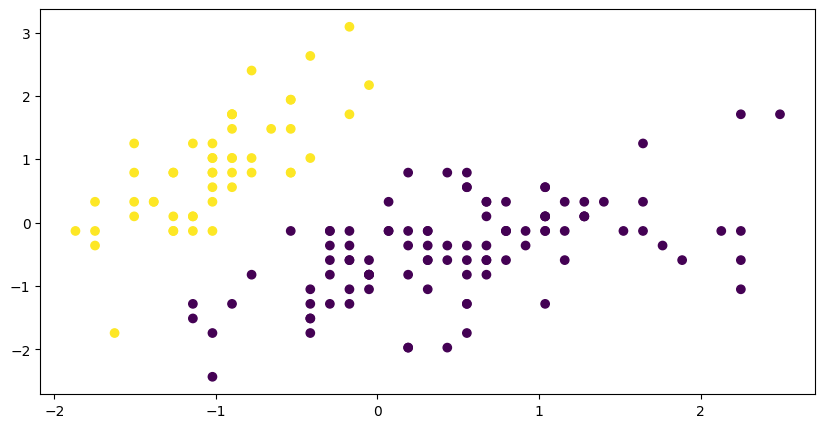

In [35]:
# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels) # WICHTIG: wir plotten nur die ersten beiden Dimensionen!  -> Nächstes mal lernen wir, wie wir mit Downprojection eine besser Visualisierung erhalten
plt.show()

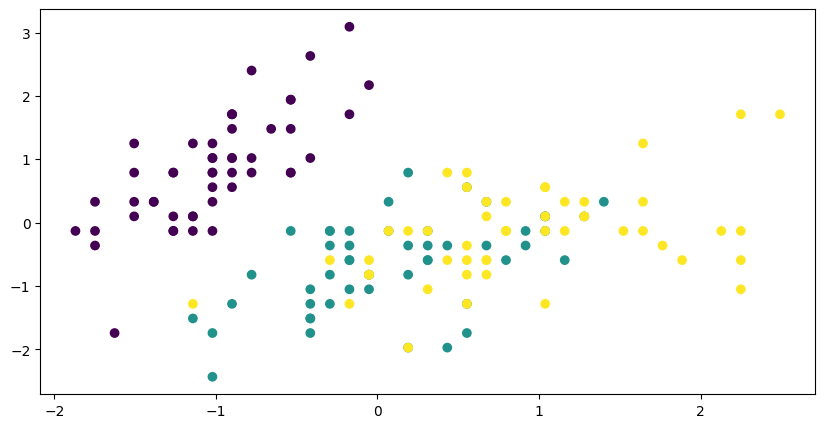

In [24]:
# vergleichen wir das nun mit den echten Labels
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.show()

**Wichtig** Den 2. Plot haben wir normalerweise *NICHT* zur Verfügung. Im Unsupervised Learning ist kein Label vorhanden!

Was passiert, wenn wir die Anzahl der Cluster ändern?
Wie gut funktioniert das ganze bei dem *Wine* Dataset?

## Affinity Propagation

Wir sehen uns nun den *Affinity-Propagation* Clustering Algorithmus an. Im Gegensatz zu $k$-Means ist dieser ein Clustering-Algorithmus, der **keine vorherige Festlegung der Clusteranzahl** benötigt. Stattdessen basiert er auf einem Message-Passing-Verfahren zur Identifikation der optimalen Clusterzentren.

Der Affinity Propagation Algorithmus $\ldots$
* $\ldots$ wird zur Clusterbildung verwendet
* $\ldots$ nutzt ein Ähnlichkeitsmaß zwischen Datenpunkten, anstatt einer Distanzmetrik
* $\ldots$ **wählt Datenpunkte** als Cluster Centers

![Affinity_Propagation_Overview](../resources/affinity_propagation_overview.png)

(von https://python.plainenglish.io/the-mechanics-of-affinity-propagation-clustering-eb199cc7a7c2?gi=4a1093a86978)

## Beschreibung des Algorithmus

1. **Punkte als mögliche Clusterzentren betrachten:**  
   Jeder Datenpunkt wird zunächst als potenzielles Clusterzentrum angesehen.
   
2. **Austausch von "Botschaften" zwischen den Punkten:**  
   Die Punkte kommunizieren miteinander, um herauszufinden, welche Punkte gute Clusterzentren (sogenannte **Exemplare**) sein könnten. Dabei werden zwei Arten von Informationen ausgetauscht:
   - **"Verantwortung"**: Ein Punkt teilt einem anderen Punkt mit, wie gut er sich als dessen Clusterzentrum eignet.
   - **"Verfügbarkeit"**: Ein Punkt teilt mit, wie sehr er bereit ist, ein Clusterzentrum zu sein.

3. **Iterativer Prozess:**  
   Diese Kommunikation wird in mehreren Runden durchgeführt, bis sich die Clusterzentren stabilisiert haben.

4. **Zuordnung der Punkte:**  
   Am Ende ordnet der Algorithmus alle Punkte den endgültigen Clusterzentren zu.

Wir geben nun auch noch ein **Beispiel** an, um sich das besser vorstellen zu können.

**Ein Beispiel zur Veranschaulichung**

Stellen wir uns vor, du arbeitest in einem Unternehmen und möchtest Teams basierend auf den Fähigkeiten und Interessen der Mitarbeiter bilden.

1. **Jeder Mitarbeiter ist ein potenzielles Team-Leader-Kandidat.**  
   Anfangs wird niemand als Teamleiter festgelegt – jeder könnte einer sein.

2. **Mitarbeiter tauschen Informationen aus.**  
   Sie bewerten einander:  
   - *Verantwortung:* "Passt Person X als Teamleiter zu mir?"  
   - *Verfügbarkeit:* "Bin ich überhaupt gut als Teamleiter geeignet?"  

3. **Nach mehreren Feedback-Runden stehen die besten Teamleiter fest.**  
   Mitarbeiter, die am meisten Unterstützung als Teamleiter erhalten, werden zu Clusterzentren.

4. **Alle anderen schließen sich dem nächstgelegenen Teamleiter an.**  
   Jetzt sind klare Teams entstanden, ohne dass vorher festgelegt wurde, wie viele es sein müssen.

**Hinweis:** Die obige Beschreibung ist eher oberflächlich, jedoch würde die genaue Beschreibung dieses Algorithmus hier etwas über das Ziel hinaus schießen. 

## Vorteile und Nachteile

**Vorteile**:
* Kein Wert $k$ als Anzahl der Clusterzentren notwendig
* Schnelle konvergenz

**Nachteile:**
* Kein Wert $k$ als Anzahl der Clusterzentren notwendig
* Sehr teuer (rechenintensiv)
* Schwer zu interpretieren, was genau passiert

## Tipps und Tricks

* Es können Präferenzwerte für gewisse Punkte vergeben werden, falls diese stärker/schwächer als potenzielle Cluster-Zentren herangezogen werden sollen
* Da auch dieser Algorithmus iterativ funktioniert, kann es bei schlechter Performance helfen, Parameter, die das Algorithmus- bzw. das Konvergenzverhalten beinflussen, zu ändern

## Affinity Propagation in Python

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [12]:
X, y_true = load_iris(return_X_y=True, as_frame=False)

In [ ]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
X.shape

(150, 4)

In [15]:
# Normalisieren der Daten
X = StandardScaler().fit_transform(X)

In [16]:
# affinity propagation clustering
affinity_prop = AffinityPropagation(random_state=42)
affinity_prop_labels = affinity_prop.fit_predict(X) # fit_predict führt fit und predict zusammen aus

In [17]:
affinity_prop_labels

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 3, 3, 3, 2, 7, 4, 3, 2, 3, 4, 2, 4, 2, 7, 4, 3,
       4, 4, 2, 2, 7, 4, 7, 4, 3, 3, 3, 3, 7, 2, 2, 2, 4, 7, 4, 3, 3, 2,
       4, 2, 4, 7, 4, 2, 4, 4, 4, 4, 2, 4, 8, 7, 5, 7, 8, 5, 2, 5, 7, 6,
       8, 7, 8, 7, 7, 8, 3, 6, 5, 2, 8, 7, 5, 7, 8, 5, 7, 7, 7, 5, 5, 6,
       7, 7, 7, 5, 8, 3, 7, 8, 8, 8, 7, 8, 8, 8, 7, 8, 8, 7])

In [18]:
# Anzahl der Cluster in Affinity Propagation
n_clusters = len(np.unique(affinity_prop_labels))
n_clusters

9

In [19]:
# Kombinieren der Clusterlabels mit den wahren Labels
df = pd.DataFrame(X, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
df['affinity_prop_labels'] = affinity_prop_labels
df['true_labels'] = y_true
df

,Sepal length,Sepal width,Petal length,Petal width,affinity_prop_labels,true_labels
0,-0.900681,1.019004,-1.340227,-1.315444,1,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0,0
2,-1.385353,0.328414,-1.397064,-1.315444,0,0
3,-1.506521,0.098217,-1.283389,-1.315444,0,0
4,-1.021849,1.249201,-1.340227,-1.315444,1,0
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,8,2
146,0.553333,-1.282963,0.705921,0.922303,7,2
147,0.795669,-0.131979,0.819596,1.053935,8,2
148,0.432165,0.788808,0.933271,1.448832,8,2


Wie bewerten wir das?

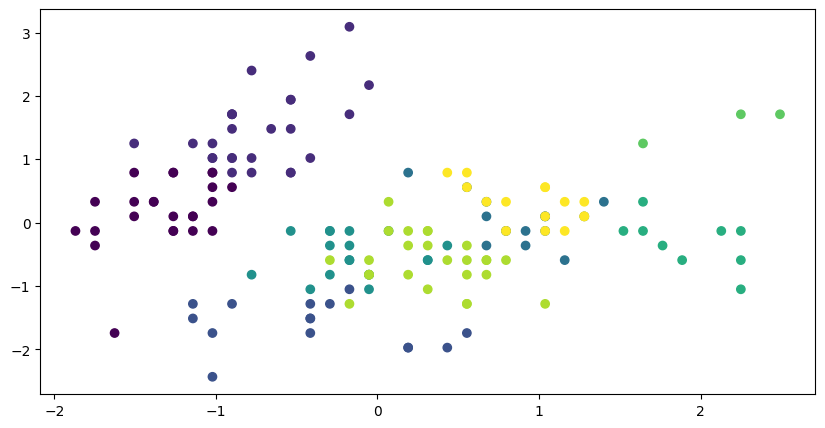

In [20]:
# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=affinity_prop_labels) # WICHTIG: wir plotten nur die ersten beiden Dimensionen!  -> Nächstes mal lernen wir, wie wir mit Downprojection eine besser Visualisierung erhalten
plt.show()

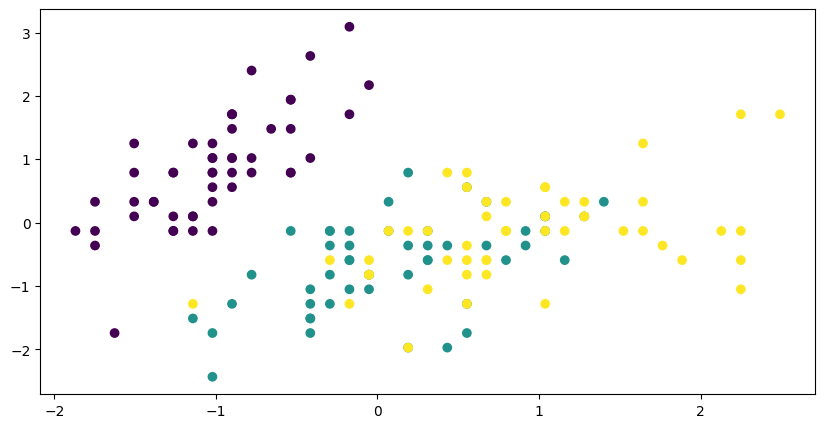

In [21]:
# Vergleichen wir das nun mit den echten Labels
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.show()

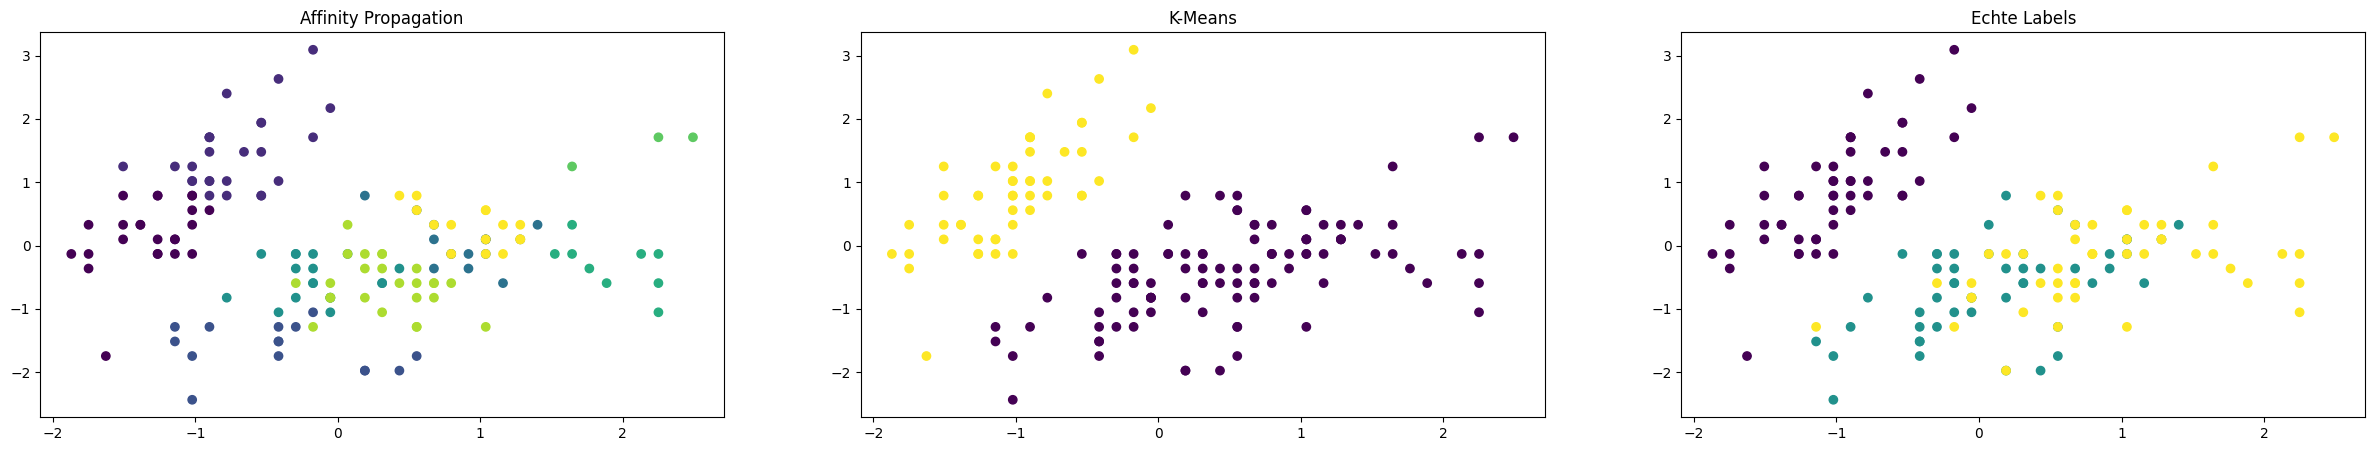

In [22]:
# Vergleich von affinity propagation und k-means nebeneinander und echten Labels

plt.figure(figsize=(30, 5))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=affinity_prop_labels)
plt.title("Affinity Propagation")
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.title("K-Means")
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.title("Echte Labels")
plt.show()

Was sind hier die Unterschiede?

---

### Sonstiges

* Es gibt noch viele weitere Clustering Methoden
* Wir werden darauf aber nicht mehr genauer eingehen (Referat?)
* Haben alle ihre Vor- und Nachteile

---

## Aufgabe

* Verwende nun die folgenden Datasets und versuche die Aufgabenstellungen zu beantworten.
* Lade dazu das Dataset mit den bekannten Methoden (Laden mit Hilfe von `pd.read_csv`).
* Verwende für jede Aufgabe eigene Code-Zellen und dokumentiere für die verschiedenen Durchläufe die Ergebnisse.

**Aufgaben**
1) HELP International konnte rund 10 Millionen Dollar aufbringen. Nun muss der Geschäftsführer der NRO entscheiden, wie er dieses Geld strategisch und effektiv einsetzen will. Der CEO muss also entscheiden, welche Länder die Hilfe am dringendsten benötigen. Ihre Aufgabe als Datenwissenschaftler besteht also darin, die Länder anhand einiger sozioökonomischer und gesundheitlicher Faktoren zu kategorisieren, die die Gesamtentwicklung des Landes bestimmen. Sie müssen also Länder vorschlagen, auf die sich der CEO am meisten konzentrieren soll.

    *Dataset:* Country `country.csv` (verwendet von https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv)

2) Nach der HTL-Karriere beschließen Sie, für eine gewisse Zeit ins Ausland zu gehen. Dabei wollen Sie in ein Land ziehen, in welchem die Länder besonders glücklich sind. Versuchen Sie nun das nachfolgende Dataset zu gruppieren und herauszufinden, in welchen Ländern (Gruppen) die Menschen ähnlich glücklick zu sein scheinen.

    *Dataset:* Happiness 2017 `happiness_2017.csv` (verwendet von https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2017.csv)

19


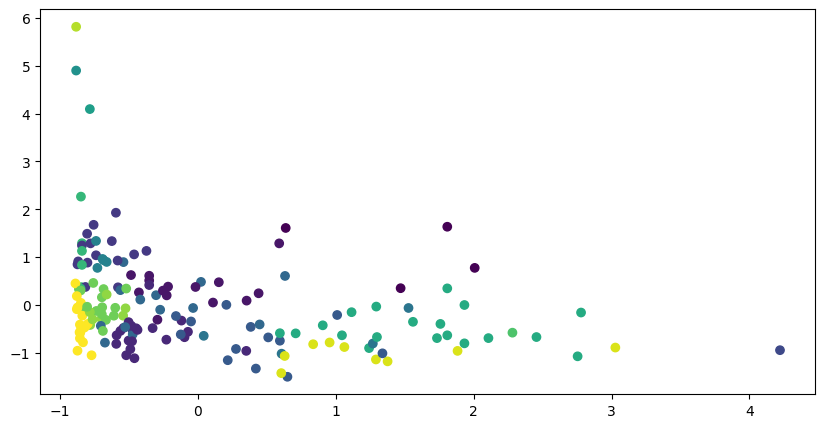

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
ds = pd.read_csv("../../_data/country.csv") # ggf. etwas anders als unser bisheriges Dataset
ds = ds.dropna()
X = ds.select_dtypes(include=[np.number])

X = StandardScaler().fit_transform(X)
affinity_prop = AffinityPropagation(random_state=42)
affinity_prop_labels = affinity_prop.fit_predict(X) # fit_predict führt fit und predict zusammen aus
n_clusters = len(np.unique(affinity_prop_labels))
print(n_clusters)
df = pd.DataFrame(X, )
df['affinity_prop_labels'] = affinity_prop_labels

# Plot mit Affinity-Labels
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=affinity_prop_labels) # WICHTIG: wir plotten nur die ersten beiden Dimensionen!  -> Nächstes mal lernen wir, wie wir mit Downprojection eine besser Visualisierung erhalten
plt.show()

16


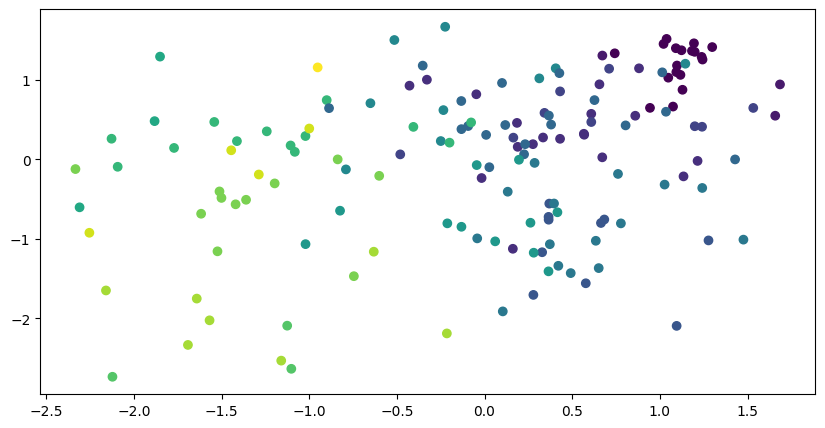

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
ds = pd.read_csv("../../_data/happiness_2017.csv") # ggf. etwas anders als unser bisheriges Dataset
ds = ds.dropna()
X = ds.select_dtypes(include=[np.number])

X = StandardScaler().fit_transform(X)
affinity_prop = AffinityPropagation(random_state=42)
affinity_prop_labels = affinity_prop.fit_predict(X) # fit_predict führt fit und predict zusammen aus
n_clusters = len(np.unique(affinity_prop_labels))
print(n_clusters)
df = pd.DataFrame(X, )
df['affinity_prop_labels'] = affinity_prop_labels

# Plot mit Affinity-Labels
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 2], X[:, 3], c=affinity_prop_labels) # WICHTIG: wir plotten nur die ersten beiden Dimensionen!  -> Nächstes mal lernen wir, wie wir mit Downprojection eine besser Visualisierung erhalten
plt.show()